## Testar machine learn para prever um grupo

In [4]:
import pandas as pd

dados = pd.read_csv("Dados_Arritimia_final.csv")
dados.dropna(inplace=True)


In [5]:
# Separar os itens para aprendizado

x = dados.drop(columns=["Canal (Derivação)", "Sexo", "Medicamentos", "Registro", "Tipo", "Rotulos", "Rotulos_Nome", "Indicador_Zero", "Padrao_AAMI"])
y = dados["Padrao_AAMI"]
y_binary = [0 if label == "N" else 1 for label in y]

In [10]:
# Separar treino e teste para o binário
from sklearn.model_selection import train_test_split

x_train, x_test, y_binary_train, y_binary_test = train_test_split(x, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

In [7]:
# Treino do primeiro modelo
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(x_train, y_binary_train)

KeyboardInterrupt: 

In [11]:
# Treino com segundo modelo 
from xgboost import XGBClassifier

num_negativos = sum(1 for label in y_binary_train if label == 0)
num_positivos = sum(1 for label in y_binary_train if label == 1)
scale_pos_weight = num_negativos / num_positivos


# Treino do modelo com XGBoost
model_xgb = XGBClassifier(
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    max_depth=5,
    learning_rate=0.05,
    n_estimators=300,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)


model_xgb.fit(x_train, y_binary_train)
# 193 | 1752

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

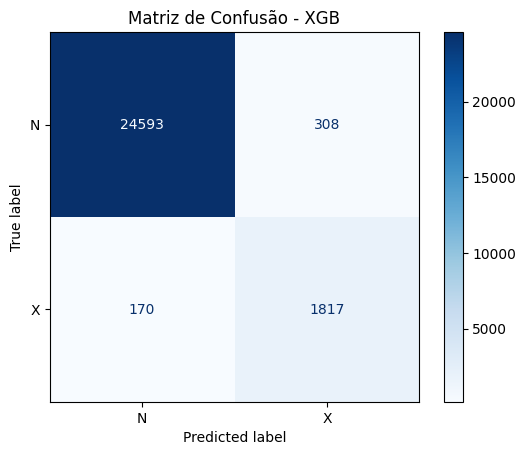

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

previsao = model_xgb.predict(x_test)

# Gerar a matriz de confusão
cm = confusion_matrix(y_binary_test, previsao)

# Exibir a matriz de confusão como gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["N", "X"])
disp.plot(cmap="Blues", values_format="d")  # 'cmap' define o esquema de cores, 'values_format' formata os números
plt.title("Matriz de Confusão - XGB")
plt.show()
